<a href="https://colab.research.google.com/github/fdafadf/ml/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Regresja liniowa

## Wprowadzenie

Ten rozdział służy intuicyjnemu zrozumieniu czym jest regresja liniowa. Używane są zwroty potoczne, unika się używania formalizmów które pojawią się dopiero w kolejnych rozdziałach.

Celem regresji liniowej jest poszukiwanie takiej prostej która przebiega najbliżej pewnemu zbiorowi punktów. Tak jak to przedstawiono w poniższym przykładzie.

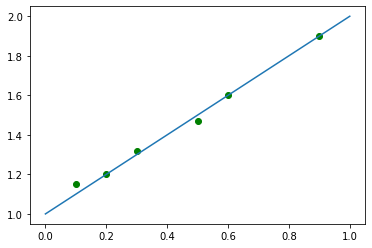

In [106]:
def draw_data_and_line(data, a, b):
  plt.scatter(*data.T, color='green')
  plt.plot([0, 1], [b, a + b])
  plt.show()

data = np.array([
  [0.1, 1.15],
  [0.2, 1.2],
  [0.3, 1.32],
  [0.5, 1.47],
  [0.6, 1.6],
  [0.9, 1.9],
])
draw_data_and_line(data, 1, 1)

Aby wiedzieć czy dana prosta lepiej oddaje położenia punktów od innej prostej potrzebujemy sposobu na obliczenie błędu z jakim konkretna prosta odwzorowuje zbiór punktów.

Najczęściej stosowana metoda polega na tym, że dla każdego punktu liczymy jego odległość od prostej w rzucie pionowym. Następnie wszystkie odległości podnosimy do kwadratu i sumujemy. Najlepiej odległości dla wszytkich punktów wynosiły 0. Oznaczało by to, że wszystkie leżą na prostej.

Zdefiniujmy funkcję która liczy błąd dla zbioru punktów i prostej.

In [102]:
def calculate_error(data, a, b):
  return sum(d * d for d in [(a * item[0] + b) - item[1] for item in data]) 

### Metoda 0

Spróbujmy wymyślić od zera metodę wyznaczenia takiej prostej.

$y = ax+b$

Zgodnie z równaniem prostej, szukamy takich wartości $a$ oraz $b$ dla której nasz `calculate_error` będzie możliwie najmniejszy.

Można zauważyć, że dla prostych z parametrem $a=0$ najlepiej dopasowana będzie ta, z parametrem $b$ równym średniej wszystkich $y$ ze zbioru punktów.


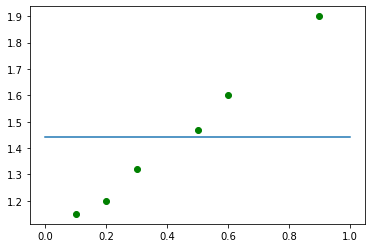

a=0, b=0, error=12.835799999999999
a=0, b=1.4400000000000002, error=0.3942


In [104]:
a = 0
b = data[:, 1].mean()
draw_data_and_line(data, a, b)
print(f"a={0}, b={0}, error={calculate_error(data, 0, 0)}")
print(f"a={a}, b={b}, error={calculate_error(data, a, b)}")

Spróbujmy teraz poprawić parametr $a$. W tym celu zdefiniujmy zbiór prostych podobnych do aktualnej, które różnią się w niewielkim stopniu parametrem $a$. 

In [ ]:
a_search_range = 2
a_step = a_search_range / 10
a_start = a - a_search_range
a_stop = a + a_search_range

for a2 in np.arange(a_start, a_stop, a_step):
  plt.plot([0, 1], [b, a2 + b])

plt.show()

Dla każdej z tych prostych możemy policzyć `calculate_error`.

In [ ]:
errors_a = np.array([[a2, calculate_error(data, a2, b)] for a2 in np.arange(a_start, a_stop, a_step)])
plt.scatter(*errors_a.T, color='green')
plt.show()

Wybieramy ten parametr który okazał się najlepszy. Oto prosta którą otrzymaliśmy:

In [ ]:
a = errors_a[errors_a[:, 1].argmin()][0]
draw_data_and_line(data, a, b)

W ten sam sposób możemy poprawić parametr $b$. Wyznaczamy zbiór podobnych prostych.

In [ ]:
b_search_range = 2
b_step = b_search_range / 10
b_start = b - b_search_range
b_stop = b + b_search_range

for b2 in np.arange(b_start, b_stop, b_step):
  plt.plot([0, 1], [b2, a + b2])

plt.show()

Liczymy błąd dla każdej z nich.

In [ ]:
errors_b = np.array([[b2, calculate_error(data, a, b2)] for b2 in np.arange(b - 1, b + 1.01, 0.1)])
plt.scatter(*errors_b.T, color='green')
plt.show()

Wybieramy parametr $b$ z najmniejszym błędem.

In [ ]:
b = errors_b[errors_b[:, 1].argmin()][0]
draw_data_and_line(data, a, b)

Czynności te możemy powtarzać wielokrotnie jeśli prowadzi to do coraz dokłądniejszego wyniku. Możemy również wymyślać modyfikacje tej metody. Przykładowo można stopniowo zmniejszać wartości zmiennych `a_search_range` i `b_search_range`.

Metoda ta, choć wymyślona ad-hoc, przypomina koncepcyjnie przedstawione w dalszych rozdziałach rzeczywiście stosowane podejścia, na przykład model perceptronu.

Poniżej przykład w którym 9 razy szukamy coraz lepszych wartości parametrów $a$ i $b$ zaczynając od $a=0$ i $b=0$.

In [ ]:
def find_better(c, v, error_fn, range):
  range = 2
  step = range / 50
  start = v - range
  stop = v + range
  errors = np.array([[v2, error_fn(c, v2)] for v2 in np.arange(start, stop, step)])
  return errors[errors[:, 1].argmin()]

def find_better_a(data, a, b, i):
  return find_better(b, a, lambda b, a: calculate_error(data, a, b), 2 / i)

def find_better_b(data, a, b, i):
  return find_better(a, b, lambda a, b: calculate_error(data, a, b), 2 / i)

a = 0
b = 0

for i in range(1, 10):
  better = find_better_a(data, a, b, i)
  a = better[0]
  better = find_better_b(data, a, b, i)
  b = better[0]
  print(f"i={i}, a={a}, b={b}, error={better[1]}")

draw_data_and_line(data, a, b)

Widozna prosta wydaje się bliska optymalnemu rozwiązaniu. W następnym rozdziale opisana będzie metoda najmniejszych kwadratów która daje optymalny rezultat. Będziemy mogli porównać ten rezultat z optymalnym.

# Początek wersji ultra-roboczej 

### Metoda najmniejszych kwadratów

Niech poniższa prosta koloru niebieskiego, to prosta przy użyciu której staramy się przewidzieć wartości obserwowane $y_i$ na podstawie $x_i$. Rzeczywiście przewidziana wartość dla $x_i$ to $\hat{y}_i$.

Na wykresie punkty od $y_0$ do $y_n$ to wartości obserwowane dla wartości objaśniających $x_0$ do $x_n$. 

Punkty od $\hat{y}_0$ do $\hat{y}_n$ to kolejne wartości objaśniane przewidziane przez prostą, dla tych samych wartości objaśniających $x_0$ do $x_n$. 

Możemy policzyć błąd objaśniania dla dowolnej prostej, jest nim suma kwadratów długości czerwonych odcinków, czyli $\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$.

Szukamy takiej prostej, dla której suma błędów jest jak najmniejsza: $ min \sum_{i=1}^{n} (y_i-\hat{y}_i)^2 $.

## Przykładowe dane

Poniższa zmienna `data` opisuje przykładowy zbiór danych zaobserwowanych. Każdy element tego zbioru to dwuelementowana tablica w której pierwszy element to wartość objaśniająca $x_i$, a drugi element to wartość objaśniana $y_i$. Przykładowo `0.1` to wartość objaśniająca $x_1$, a `0.5` zaobserwowana dla niej wartość objaśniana $y_1$.

In [ ]:
data = np.array([
    [0.1, 0.5],
    [0.2, 0.3],
    [0.3, 0.6],
    [0.5, 0.4],
    [0.6, 0.3],
    [0.9, 0.7],
])

## Optymalne przewidywanie

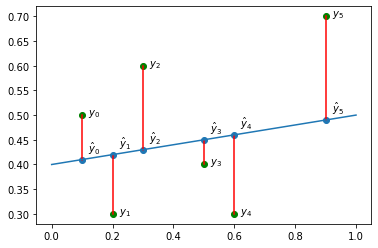

In [ ]:
tutorial.show_linear_regresion_error_lines(data)

# Nowa sekcja

In [ ]:
data_set_1 = np.array([
    [0.1, 0.5],
    [0.2, 0.3],
    [0.3, 0.6],
    [0.5, 0.4],
    [0.6, 0.3],
    [0.9, 0.7],
])
data_set_2 = np.array([
    [0.1, 0.9],
    [0.2, 0.8],
    [0.5, 0.5],
    [0.6, 0.3],
    [0.8, 0.2],
    [0.9, 0.1],
])
data_sets = [data_set_1, data_set_2]

$ min \sum_{i=1}^{n} (y_i−\hat{y}_i)^2 $

$ a = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n} (x_i - \overline{x})^2} $

$ b = \overline{y} - a \overline{x} $



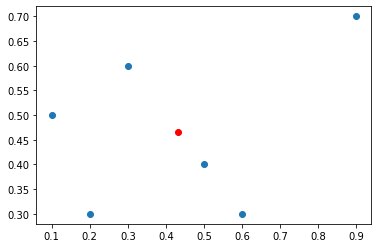

In [ ]:
data = data_set_1
x_mean = data[:, 0].mean()
y_mean = data[:, 1].mean()
x, y = data.T
plt.scatter(x, y)
plt.scatter([x_mean], [y_mean], color='red')
plt.show()

trivial_1 error: 0.1333333333333333
0.1333333333333333
trivial_2 error: 0.13795555555555553
least_squares error: 0.11599999999999999
least_qubics error: 0.11599999999999999


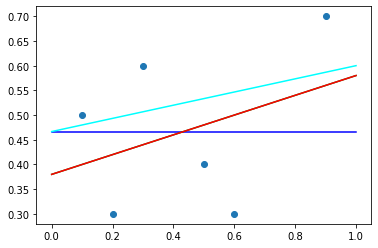

trivial_1 error: 0.5333333333333334
0.5333333333333334
trivial_2 error: 1.684622222222223
least_squares error: 0.00819672131147543
least_qubics error: 0.00819672131147543


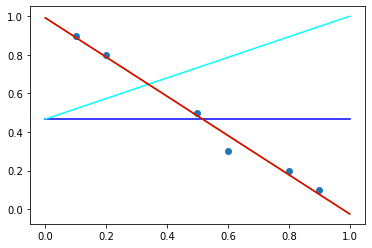

In [ ]:
def print_error(a, b, data, name):
  error = sum(d * d for d in [(a * item[0] + b) - item[1] for item in data]) 
  print(name + ' error: ' + str(error))

def draw_line(a, b, color):
  plt.plot([0, 1], [b, a + b], color=color)

def trivial_1(data):
  return 0, data[:, 1].mean()

def trivial_2(data):
  y_mean = data[:, 1].mean()
  a = sum([d * d for d in [item[1] - y_mean for item in data]])
  print(a)
  return a, data[:, 1].mean()

def least_squares(data):
  x_mean = data[:, 0].mean()
  y_mean = data[:, 1].mean()
  x_diffs = [a[0] - x_mean for a in data]
  y_diffs = [a[1] - y_mean for a in data]
  x_squares = [a * a for a in x_diffs]
  a = sum([a[0] * a[1] for a in zip(x_diffs, y_diffs)]) / sum(x_squares)
  b = y_mean - a * x_mean
  return a, b

def least_qubics(data):
  x_mean = data[:, 0].mean()
  y_mean = data[:, 1].mean()
  x_diffs = [a[0] - x_mean for a in data]
  y_diffs = [a[1] - y_mean for a in data]
  x_qubics = [a * a for a in x_diffs]
  a = sum([a[0] * a[1] for a in zip(x_diffs, y_diffs)]) / sum(x_qubics)
  b = y_mean - a * x_mean
  return a, b

def case(fun, data, color):
  line = fun(data)
  print_error(*line, data, fun.__qualname__)
  draw_line(*line, color)

for data in data_sets:
  x, y = data.T
  plt.scatter(x, y)
  case(trivial_1, data, 'blue')
  case(trivial_2, data, 'cyan')
  case(least_squares, data, 'green')
  case(least_qubics, data, 'red')
  plt.show()


https://www.mathjax.org/